# Entregável 1 - visão computacional

Nome: **William Augusto Reis da Silva**

Engenharia de Computação

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.1 


# Equalização de histograma

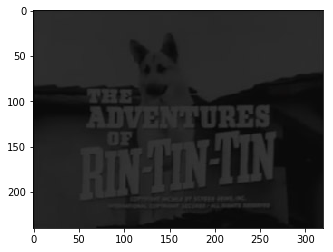

In [332]:
rintin = cv2.imread("RinTinTin.jpg")

plt.imshow(rintin)

In [333]:
rintin.shape

(240, 320, 3)

In [334]:
# Conversão para cinza
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [335]:
rintin_gray.shape

(240, 320)

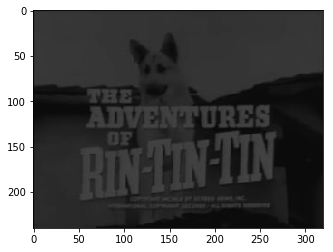

In [336]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

In [337]:
rintin_gray

array([[21, 39, 42, ..., 41, 41, 37],
       [22, 40, 44, ..., 42, 42, 37],
       [23, 41, 45, ..., 42, 43, 38],
       ...,
       [14, 28, 35, ..., 18, 18, 17],
       [16, 29, 36, ..., 18, 17, 17],
       [18, 31, 38, ..., 18, 17, 17]], dtype=uint8)

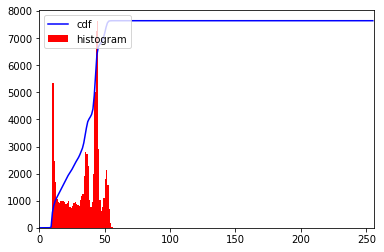

In [339]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

### Resposta 1

*O histograma não aproveita bem as faixas de cores, tendo em vista que se concentra no início e não percorre até o 255. Para aproveitar bem as faixas de cores, ele precisaria começar no 0 e ter sua distribuição até o 255.*

### Resposta 2

In [357]:
print("Valor máximo:", rintin_gray.flatten().max())
print("Valor mínimo:", rintin_gray.flatten().min())

Valor máximo: 58
Valor mínimo: 8


In [358]:
# Fazendo uma cópia da imagem para utilizar
saida = rintin_gray.copy() 

for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        # A subtração do 8 é para começar no 0. A multiplicação é para a melhor distribuição no histograma.
        saida[i][j] = (saida[i][j] - 8)*5.5

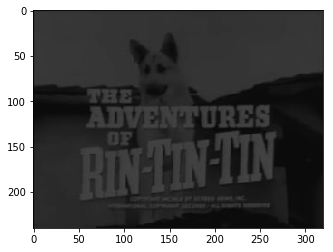

In [359]:
# Printando a imagem original novamente
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

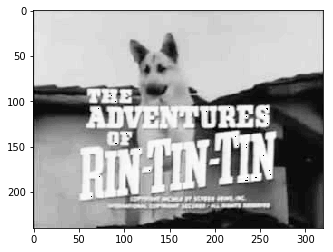

In [360]:
# Printando a imagem editada
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

## Novo histograma, com melhor distribuição

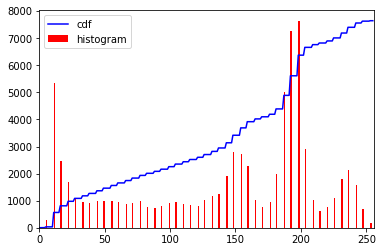

In [361]:
hist,bins = np.histogram(saida.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(saida.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


### 2.1

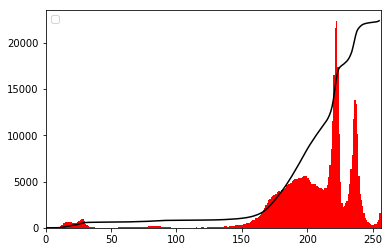

In [365]:
# Vermelho
hist, bins = np.histogram(sala_red.flatten(),256,[0,256])
cdf_red = hist.cumsum()
cdf_normalized = cdf_red * hist.max()/ cdf_red.max()

plt.plot(cdf_normalized, color = 'black')
plt.hist(sala_red.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend('cdf','histogram', loc = 'upper left')
plt.show()

(array([ 2919.,  2921.,  3288.,  2421.,  1430.,   808.,   401.,   194.,
          161.,   124.,   153.,   166.,   206.,   216.,   267.,   278.,
          352.,   409.,   520.,   607.,   511.,   456.,   380.,   178.,
          118.,   148.,   204.,   292.,   328.,   349.,   371.,   363.,
          432.,   512.,   531.,   618.,   738.,   921.,  1152.,  1597.,
         2311.,  3134.,  3814.,  4461.,  5266.,  6114.,  6903.,  7787.,
         8746.,  9178.,  8273.,  6902.,  5738.,  5210.,  4446.,  4104.,
         3891.,  3549.,  3385.,  3387.,  3403.,  3657.,  3820.,  3526.,
         3227.,  3128.,  3086.,  3236.,  3516.,  3740.,  3943.,  4322.,
         4492.,  4911.,  5306.,  5645.,  5976.,  6101.,  6462.,  6679.,
         6898.,  7160.,  7439.,  7687.,  7679.,  7767.,  7856.,  7653.,
         7624.,  7419.,  7058.,  6799.,  6285.,  5853.,  5372.,  4957.,
         4417.,  3960.,  3552.,  3271.,  2850.,  2660.,  2243.,  2078.,
         1871.,  1649.,  1435.,  1351.,  1279.,  1274.,  1302., 

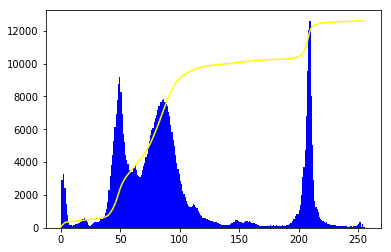

In [367]:
# Azul
sala_blue = sala_rgb[:,:,2]

hist2, bins2 = np.histogram(sala_blue.flatten(), 256, [0,256])
cdf_blue = hist2.cumsum()
cdf_normalized2 = cdf_blue * hist2.max()/cdf_blue.max()

plt.plot(cdf_normalized2, color='yellow')
plt.hist(sala_blue.flatten(),256,[0,256], color= 'b')

*Nota-se que é possível observar os objetos, tendo em vista a análise dos histogramas. Com eles, podemos ver que há um crescimento elevado em certos pontos, que demosntra onde os objetos citados estão. Dessa forma, confirma-se a tese.*

### 2.2

In [368]:
# Pegando a imagem
sala = cv2.imread("cena_canto_sala_2.jpg")

# Transformando a imagem em RGB
sala_rgb = cv2.cvtColor(sala, cv2.COLOR_BGR2RGB)

# Separando o vermelho
sala_red = sala_rgb[:,:,0]
print("Tamanho Vermelho", sala_red.shape)

# Separando o verde
sala_green = sala_rgb[:,:,1]
print("Tamanho Verde", sala_green.shape)

Tamanho Vermelho (605, 806)
Tamanho Verde (605, 806)


In [369]:
# Criando uma imagem em branco
caixa = np.zeros((605, 806), dtype=np.uint8)

# Fazendo o for para restringir ao vermelho
for i in range(sala_red.shape[0]):
    for j in range(sala_red.shape[1]):
        if sala_red[i][j] > 193 and sala_green[i][j] < 130:
            caixa[i][j] = 255        

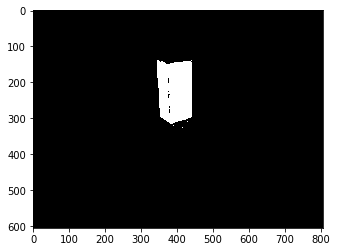

In [370]:
# Printando a imagem em preto e branco
plt.imshow(caixa, cmap="Greys_r")

In [371]:
# Criando cópia da sala colorida
caixa_colorida = sala_rgb.copy()

for i in range(caixa_colorida.shape[0]):
    for j in range(caixa_colorida.shape[1]):
        if sala_red[i][j] > 193 and sala_green[i][j] < 130:
            caixa_colorida[i][j] = 255     

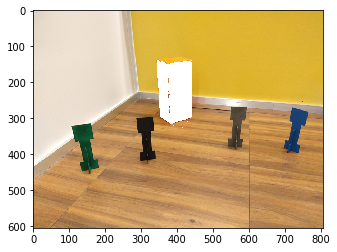

In [372]:
# Printando a imagem colorida com o branco da caixa
plt.imshow(caixa_colorida)

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [380]:
# Lendo o arquivo da imagem
hall = cv2.imread("hall_box_battery_atividade3.png")

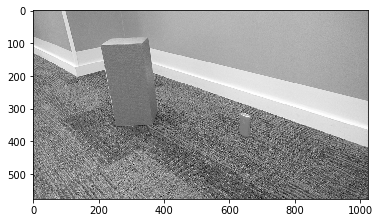

In [381]:
# Transformando para cinza
hall_gray = cv2.cvtColor(hall, cv2.COLOR_BGR2GRAY)

# Printando para observar
plt.imshow(hall_gray, cmap="Greys_r", vmin=0, vmax=255)

In [382]:
# Importando o módulo
from math import fabs

# Criando uma imagem vazia
hall = np.zeros((576, 1024), dtype=np.uint8)


for i in range(hall_gray.shape[0]):
    for j in range(hall_gray.shape[1]):
        if j == 0:
            hall[i][j] = fabs(int(hall_gray[i][j]))
        elif j == 1023:
            hall[i][j] = fabs(int(hall_gray[i][j]))
        else:
            hall[i][j] = fabs(int(hall_gray[i][j+1]) - int(hall_gray[i][j-1]))

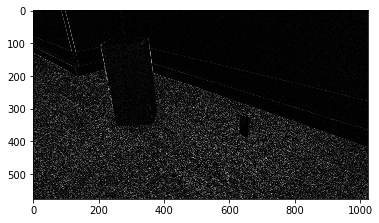

In [383]:
# Printando a imagem final
plt.imshow(hall, cmap="Greys_r", vmin=0, vmax=255)